In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

from sklearn.decomposition import PCA

Получение данных из датасета с винами

In [19]:
wineQT = pd.read_csv('./WineQT.csv').drop(columns=['Id', 'residual sugar', 'total sulfur dioxide'])

X = []


for i in wineQT.values.tolist():

    X.append(i)

In [20]:
wineQT

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,11.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,0.098,25.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,0.092,15.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,0.075,17.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,0.076,11.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,0.076,29.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,0.068,28.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,0.090,32.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,0.062,39.0,0.99512,3.52,0.76,11.2,6


Понимажем размерность данных при помощи метода главных компонент и визуализируем данные

In [21]:
pca = PCA(n_components = 2)
XPCAreduced = pca.fit_transform(X)

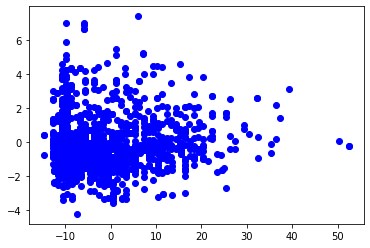

In [22]:
plt.plot([i[0] for i in XPCAreduced], [i[1] for i in XPCAreduced], 'bo')

Находим оптимальное количество кластеров

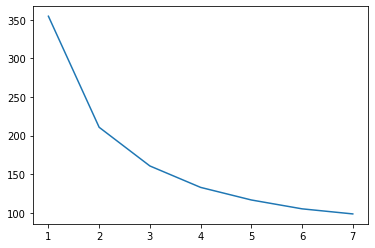

In [23]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia);

Видим что оптимальное количество кластеров равно трем ,обучаем модель, и классифицируем все вина

In [30]:
n_clusters_have = 3

modl = KMeans(n_clusters=n_clusters_have).fit(X)

In [31]:
predictions = []
for i in X:
    buf = modl.predict([i])
    predictions.append(buf)

просто функция создания n случайных цветов

In [26]:
import random
def create_rand_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(number_of_colors)]
    return color

Визуализация классификации, крестиками центроиды

C:\Users\grvla\AppData\Local\Temp/ipykernel_10028/3013347308.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot([i[0] for i in results[i]], [i[1] for i in results[i]], 'bo', c = colors[i])


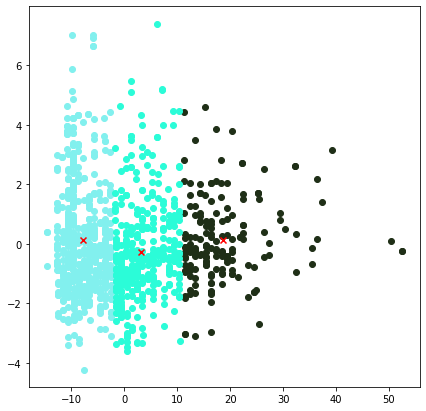

In [32]:
colors = create_rand_colors(n_clusters_have)

plt.figure(figsize=(7,7)) 

results = [[] for i in range(n_clusters_have)]

for i in range(len(predictions)):
    pred = predictions[i][0]
    results[pred].append(XPCAreduced[i])

for i in range(n_clusters_have):
    plt.plot([i[0] for i in results[i]], [i[1] for i in results[i]], 'bo', c = colors[i])



for i in range(n_clusters_have):
    buf_class = pca.transform([modl.cluster_centers_[i]])[0]
    plt.scatter(buf_class[0], buf_class[1], marker = 'x', zorder = 999, c = '#ff0000')


Создаем модель для ДБСКАНА
делаем классификацию с разнимы значениями eps
и делаем визуализацию

In [28]:
from sklearn.cluster import DBSCAN

C:\Users\grvla\AppData\Local\Temp/ipykernel_10028/3850229439.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot([i[0] for i in results[i]], [i[1] for i in results[i]], 'bo', c = colors[i])
C:\Users\grvla\AppData\Local\Temp/ipykernel_10028/3850229439.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot([i[0] for i in results[i]], [i[1] for i in results[i]], 'bo', c = colors[i])
C:\Users\grvla\AppData\Local\Temp/ipykernel_10028/3850229439.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot([i[0] for i in results[i]], [i[1] for i in results[i]], 'bo', c = colors[i])


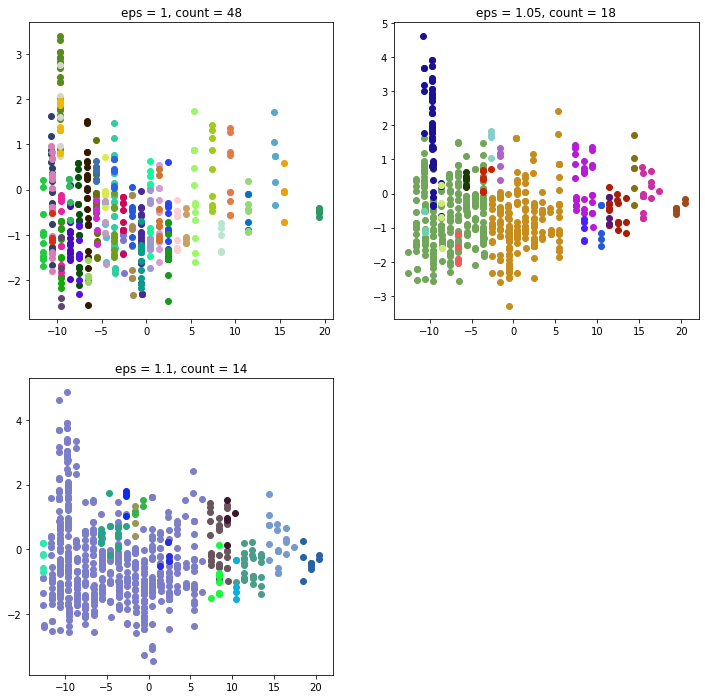

In [29]:
variants = [1, 1.05, 1.1]

stolb = 2
strok = len(variants) // stolb + len(variants) % stolb

plt.figure(figsize=(12, 12)) 

for index in range(len(variants)):

    plt.subplot(strok,stolb,index + 1)
    

    lengh_variable = variants[index]

    dbscanpredicts = DBSCAN(eps = lengh_variable).fit_predict(X)
    number_of_dbscan_clusters = max(dbscanpredicts) + 1

    buf = {}
    for i in list(set(dbscanpredicts)):
        buf[i] = 0

    for i in dbscanpredicts:
        buf[i] += 1

    count_c_dbscan = max(dbscanpredicts) + 1

    plt.title(f'eps = {variants[index]}, count = {count_c_dbscan}')

    colors = create_rand_colors(count_c_dbscan)

    results = [[] for i in range(count_c_dbscan)]

    for i in range(len(dbscanpredicts)):
        pred = dbscanpredicts[i]
        if pred != -1:
            results[pred].append(XPCAreduced[i])

    for i in range(count_c_dbscan):
        plt.plot([i[0] for i in results[i]], [i[1] for i in results[i]], 'bo', c = colors[i])




